# Predicting Power Ouput of a Combined Cycle Power Plant
## 1. Introduction/Business Understanding
    Combined cycle power plant (CCPP) is a kind of power plant which is composed of gas turbines, steam turbines and heat recovery steam generator (Figure below). In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle. A CCPP can generate up to 50 percent more electricity from the same fuel than a traditional simple-cycle plant by routing the waste heat from the gas turbine to the nearby steam turbine, which generates extra power. A CCPP mechanism can be described as below.   

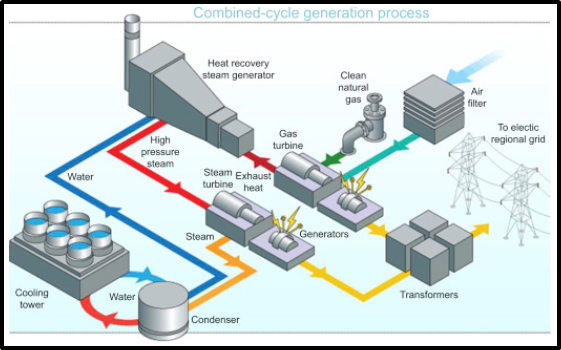

    
    1) Fuel burns at the gas turbine, makes the turbine blades spinning and driving electricity generators. 2) Heat Recovery Steam Generator (HRSG) captures exhaust heat from the gas turbine. The HRSG creates steam from the gas turbine exhaust heat and delivers it to the steam turbine. 3) Steam turbine uses the steam delivered by the heat recovery system to generate additional electricity by driving an electricity generator. Gas turbine load is sensitive to the ambient conditions e.g. ambient temperature (AT), atmospheric pressure (AP), and relative humidity (RH). However, steam turbine load is sensitive to the exhaust steam pressure (or vacuum, V). 
    

    Here is an real-world example of demand forecast and actual demand for power on hourly time scale within a day(from available resources from the California power grid: http://www.caiso.com/Pages/TodaysOutlook.aspx)

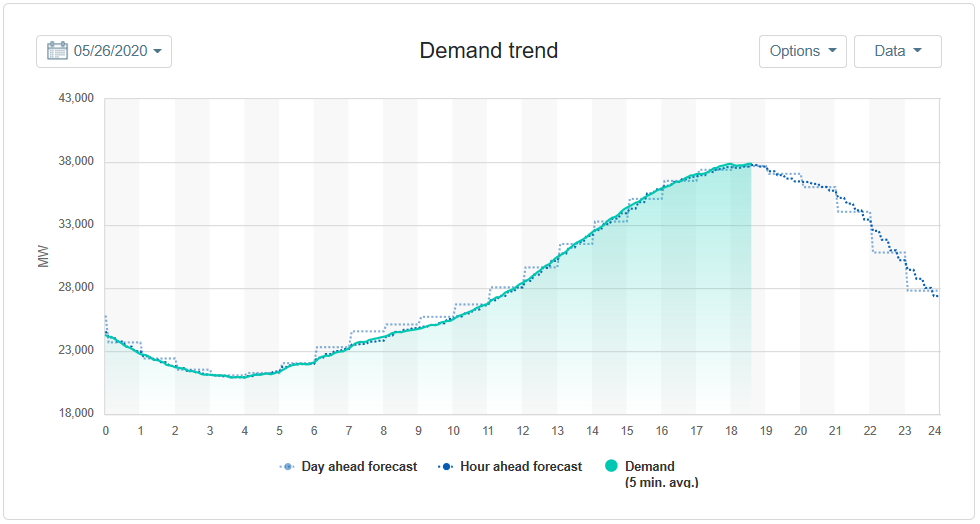

Also, power is supplied by the grid from multiple resources to meet the demand as shown in Figure below. And contribution from each source changes with time (also shown in figure below).

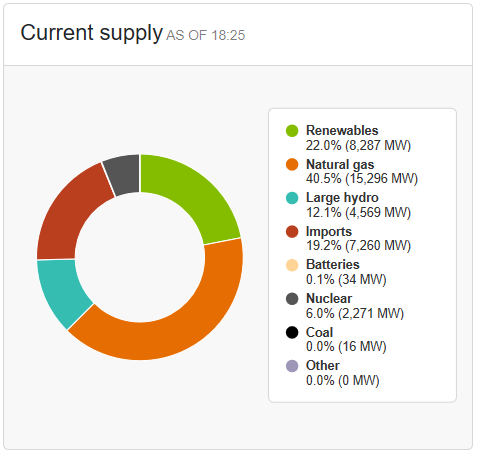

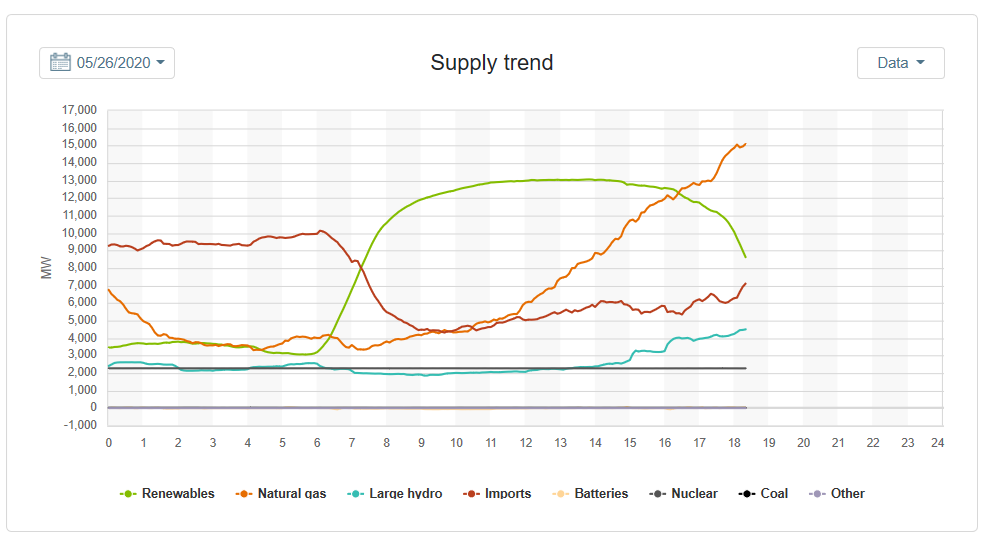

    Power generation is a complex process. Understanding and predicting power output is an important element in managing a plant and its connection to the power grid. The operators of a regional power grid forecast power demand based on historical data. Then, they compare the forecast against power supply from available resources (e.g., coal, natural gas, nuclear, solar, wind, hydro power plants, CCPP etc). Power generation technologies e.g. solar and wind are highly dependent on environmental conditions. Also, power generation technologies are subject to planned and unplanned maintenances. 
    

# 2. Business Problem and Use Case

    The challenge for a power grid operator is to manage a shortfall in available resources versus actual demand for power. Therefore, it is extremely vital to forecast power supply from available resources. Predicting the electricity generated hourly based on ambient variables enables to evaluate whether the generated power will be sufficient to meet the growing consumer demands. Proactive steps to address the demands can be taken if the forecasted power is found to be insufficient e.g. build more base load power plants (this process can take many years to decades of planning and construction), buy and import power from other regional power grids (this choice can be very expensive), or turn on small Peaker or Peaking Power Plants.
    In this project, power generated by a CCPP will be forecasted and its accuracy will be determined based on data of ambient conditions e.g. ambient temperature (AT), atmospheric pressure (AP), relative humidity (RH) and exhaust steam pressure (or vacuum, V). 
    This forecast will help 
    1)	Better management of power supply to meet the consumer demand
    2)	Take the most viable option economically to meet the consumer demand e.g. build more power plants, buy power from other grids or turn on peakers
    3)	Better management of power shortfalls from other sources of power supply due to planned and unplanned maintenances and inconsistent environmental conditions in case of solar and wind plants.

    The ambient conditions data will be used to develop a correlation to forecast power output of CCPP by using regression models and neural network. The correlation will be used by the power grid to forecast power output from a CCPP. The forecasted power from a CCPP (with the help of regression machine learning models) will be used to manage power supply and power shortfalls from other sources and to make decision about the most viable option to meet consumer demand. The correlation will be handed over to the management of power plant in the form of project report.   


# Data Source
    The data was retrieved from UCI machine learning reporsitory and loaded on IBM cloud opbject storage. The link is given below.
    https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
    The schema definition from UCI repository is given below:

    AT = Atmospheric Temperature in C
     V = Exhaust Vacuum Pressure
    AP = Atmospheric Pressure
    RH = Relative Humidity
    PE = Power Output. This is the value we are trying to forecast from the parameters given above.    

In [1]:
# The code was removed by Watson Studio for sharing.

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200527204205-0000
KERNEL_ID = 33925de8-5a59-45c5-a9d4-ed217b2add6c


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [2]:
#Check the names and data types of the columns
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

# Exploratory Data Analaysis
    Let's look at minimum, maximum, quartile and mean values of each column.


In [4]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


    The result shows that relative humidity and plant power output have the highest standard deviation. Relative humidity depends upon ambient pressure and temperature and, therefore, has standard deviation (more widely spread out) than both temperature and pressure individually. The high standard deviation of power out also shows its high variability indicating the impact of variation of ambient conditions on power output. However, maximum value is only around 10% higher than the mean value unlike relative humidity, exhaust vacuum and ambient temperature. Atmospheric pressure has low standard deviation and indicates low variability because atmospheric pressure does not change much generally.
    Let's look at number of missing values in each column.

In [5]:
print("Number of NaN values for the column temperature :", df['AT'].isnull().sum())
print("Number of NaN values for the column exhaust_vacuum :", df['V'].isnull().sum())
print("Number of NaN values for the column ambient_pressure :", df['AP'].isnull().sum())
print("Number of NaN values for the column relative_humidity :", df['RH'].isnull().sum())
print("Number of NaN values for the column energy_output :", df['PE'].isnull().sum())

Number of NaN values for the column temperature : 0
Number of NaN values for the column exhaust_vacuum : 0
Number of NaN values for the column ambient_pressure : 0
Number of NaN values for the column relative_humidity : 0
Number of NaN values for the column energy_output : 0


Let's look at box plot of each parameter.

[Text(0, 0.5, 'AtmTemperature')]

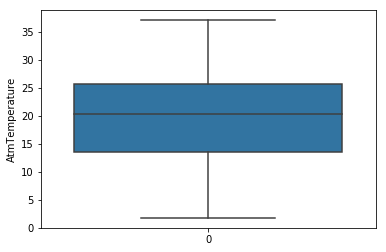

In [4]:
import requests 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ax1 = sns.boxplot(data=df['AT'])
ax1.set(ylabel='AtmTemperature')

The ambient temperature box plot shows that there is no outliar in this data column. Simlarly other columns also have no or very few outliars as show below.

[Text(0, 0.5, 'ExhaustV')]

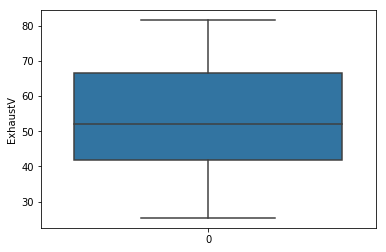

In [5]:
ax2 = sns.boxplot(data=df['V'])
ax2.set(ylabel='ExhaustV')

[Text(0, 0.5, 'AtmPressure')]

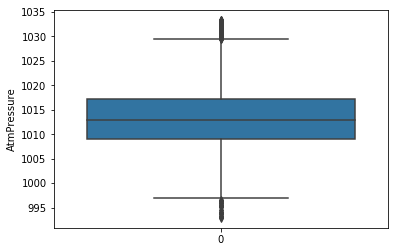

In [6]:
ax3 = sns.boxplot(data=df['AP'])
ax3.set(ylabel='AtmPressure')

[Text(0, 0.5, 'RelHumidity')]

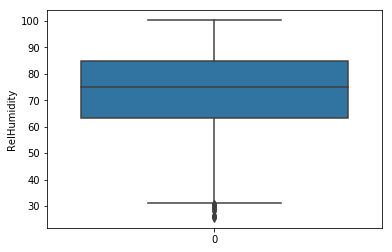

In [7]:
ax4 = sns.boxplot(data=df['RH'])
ax4.set(ylabel='RelHumidity')

[Text(0, 0.5, 'PowerOut')]

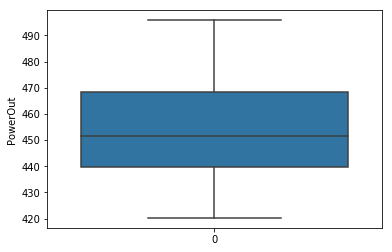

In [8]:
ax5 = sns.boxplot(data=df['PE'])
ax5.set(ylabel='PowerOut')

    Box plots show that both atmospheric pressure and relative humidity have outliers. Outliers in the relative humidity lie in 20-30% range approximately while outliers in atmospheric pressure less than 997 and greater than 1030. Atmospheric pressure has almost normal distribution (zero skewness) while other parameters have visible skewness.
    Let's examine correlation between power output and environmental conditions for a CCPP.

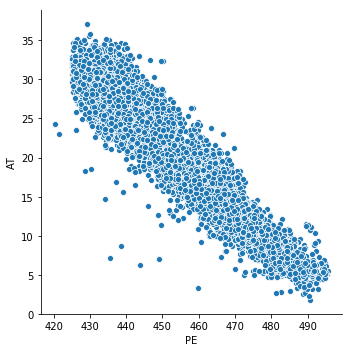

In [9]:
sns.relplot(x="PE", y="AT", data=df)

The graph above show that there is strong linear correlation between Ambient Temperature and Power Output.

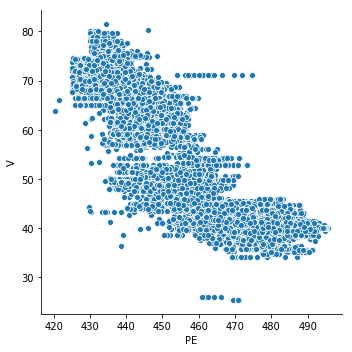

In [19]:
sns.relplot(x="PE", y="V", data=df)

The graph above show that there is linear correlation between Exhaust vacuum and Power Output.

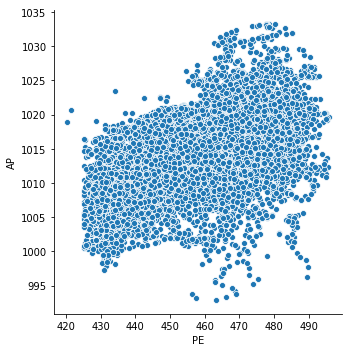

In [20]:
sns.relplot(x="PE", y="AP", data=df)

The graph above show that there is almost a linear correlation between Ambient Pressue and Power Output.

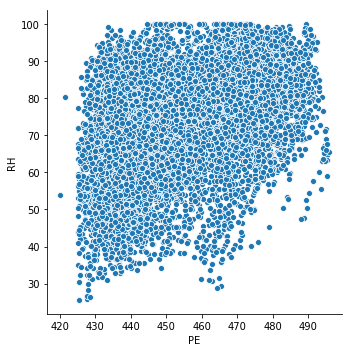

In [21]:
sns.relplot(x="PE", y="RH", data=df)

Scatter plots were plotted to see relationship between dependent variable (Power output) and independent variables. They show that ambient temperature and exhaust vacuum have a linear and stronger relationship than atmospheric pressure and relative humidity. Also, atmospheric temperature affects exhaust vacuum pressure considerably. Also, these that it is hard to see a correlation between relative humidity and power output.

In [24]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


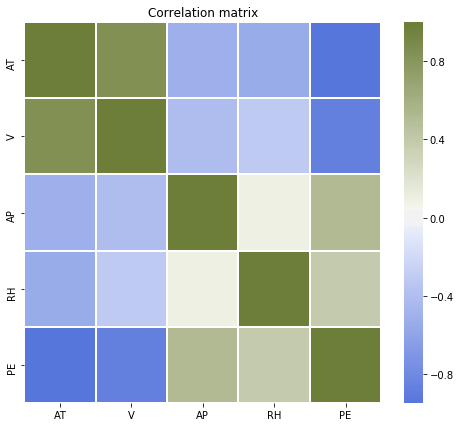

In [25]:
def coll_plot(df, title):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = False
    f, ax = plt.subplots(figsize=(8, 7))
    plt.title(title)
    cmap = sns.diverging_palette(-100, 100, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, linewidths=1)
    
coll_plot(df, 'Correlation matrix')

    To investigate correlation among different variables further, correlation coefficients (R) were calculated and correlation matrix was plotted. The graph shows that Ambient temperature and exhaust vacuum are strongly linearly related to each other and to the power output, while Atmospheric pressure and relative humidity have weak linear relations to all other variables and output. Therefore, ambient temperature and exhaust vacuum pressure are considered governing variables. The atmospheric pressure correlates stronger with the plant power output that also defines an features variation. The effect of absence and presence of each of variable on regression modeling can be studied by feature engineering. Therefore models (or pipelines for models) were created with all four independent variables as input features, 3 independent variables (ambient temperature,  exhaust vacuum pressure, and atmospheric pressure) as input features and two independent variables (ambient temperature and exhaust vacuum pressure) as input features.
    To see the correlation of environmental parameters with each other

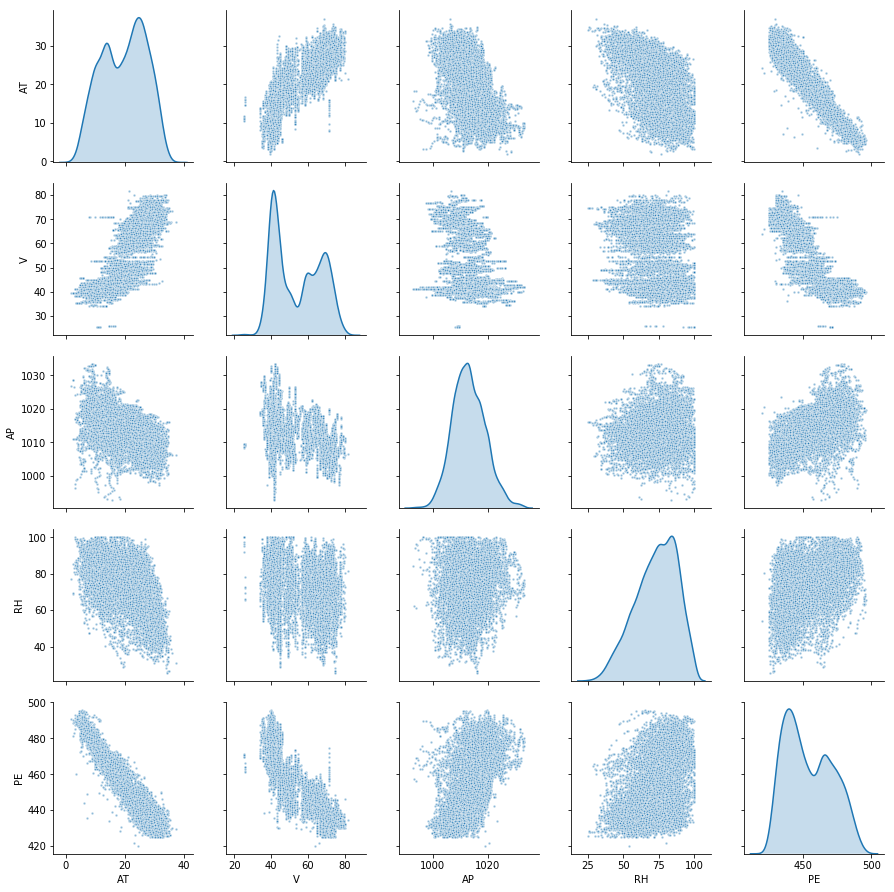

In [26]:
sns.pairplot(df, kind="scatter", plot_kws={"s": 25,"alpha":0.5}, markers=".", diag_kind='kde')

The graphs above show that atmospheric temperature has strong linear correlation with exhaust vacuum and power out put than with ambient pressure and relative humidity. Also, ambient pressure has linear relationship ambient temperature and exhaust vacuum.